In [1]:
!pip install tensorflow==2.8.0
!pip install tensorflow-hub==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goog

## 🔴 Pre-requisites

### ⭐ Import Libraries


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-12 05:12:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-09-12 05:12:50 (18.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
import sklearn

import os
from helper_functions import calculate_results

### ⭐ Import Datasets

In [4]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [5]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [6]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [7]:
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## 🔴 Data Preprocessing

### ⭐ Fn: `get_lines(filename)`:
- `arguments`: str:filename
- `returns`: all the text from the given file if exists
- example:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',]
```


In [8]:
def get_lines(filename):

  with open(filename, "r") as f:

    return f.readlines()

In [9]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

### ⭐ Fn: `preprocessing(filename)`:
- `arguments`: filename
- `returns`: A list of dictionaries each containing a line from an abstract, the actual text,the line number, total number of lines
- example:
```
[{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
```
       

In [10]:
def preprocess(filename):

  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [11]:
%%time
train_samples = preprocess(data_dir + "train.txt")
val_samples = preprocess(data_dir + "dev.txt")
test_samples = preprocess(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 625 ms, sys: 132 ms, total: 757 ms
Wall time: 939 ms


(180040, 30212, 30135)

In [12]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

### ⭐ Understanding data


In [13]:
# converting the list of dictionaries to pandas dataframes

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [14]:
train_df['target'].value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: >

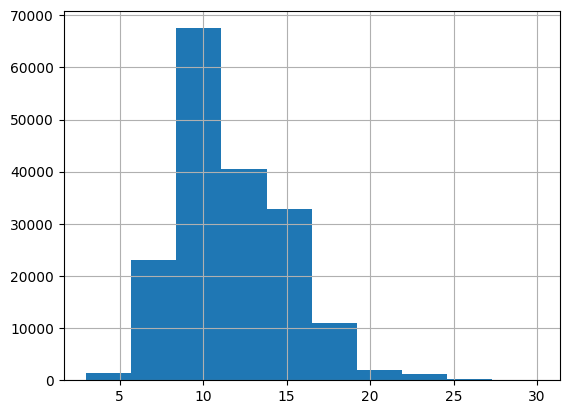

In [15]:
train_df['total_lines'].hist()

In [16]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [17]:
# validating the dataframe conversion

(len(train_sentences), len(val_sentences), len(test_sentences)) == (len(train_samples), len(val_samples), len(test_samples))

True

In [88]:
# one hot encoding the 'target' column

onehot = sklearn.preprocessing.OneHotEncoder(sparse = False)

train_labels = onehot.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels = onehot.transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels = onehot.transform(test_df['target'].to_numpy().reshape(-1, 1))

train_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
# label encoder

label_encoder = sklearn.preprocessing.LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [20]:
classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## 🔴 Models

### ⭐ Model 0 | Naive Bayes | Baseline

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

model0.fit(X=train_sentences, y=train_labels_encoded);

model0.score(X=val_sentences, y=val_labels_encoded)

0.7218323844829869

In [22]:
preds0 = model0.predict(val_sentences)
results0 = calculate_results(val_labels_encoded, preds0)
results0

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### ⭐ Model 1 | Tokenization

In [23]:
# calculating the average length of all the sentences

sent_lens = [len(i.split()) for i in train_sentences]

avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

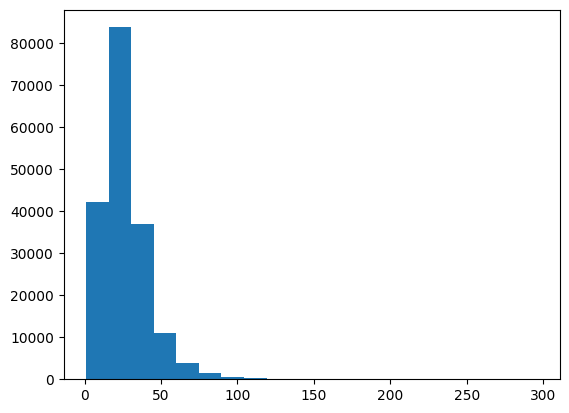

In [24]:
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins = 20)

In [25]:
output_length = int(np.percentile(sent_lens, 93))
output_length

50

In [26]:
from tensorflow.keras.layers import TextVectorization

maxtokens = 68000 # can be found in the research paper

tv = TextVectorization(max_tokens = maxtokens,
       output_sequence_length = output_length)
tv

In [27]:
tv.adapt(train_sentences)

In [28]:
import random
chosen = random.choice(train_sentences)
print(f"The chosen text: \n{chosen}")
print(tv([chosen]))

The chosen text: 
the difference between the two groups was statistically significant ( p < @ ) .
tf.Tensor(
[[  2  74  30   2  51  24  10 232  37  14   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 50), dtype=int64)


In [29]:
# summary of text vectorizer

tv.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 50,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [30]:
em = layers.Embedding(input_dim = 64841, # vocab length
                      output_dim = 128,
                      mask_zero = True, # handles sequences of variable length
                      )

In [31]:
em(tv([chosen]))

<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
array([[[-0.00192017,  0.01604292,  0.02514261, ...,  0.0232088 ,
          0.03317418,  0.04373822],
        [-0.03471188, -0.0447084 ,  0.00708022, ..., -0.00206789,
         -0.03915323,  0.00617097],
        [-0.00968126,  0.0441348 , -0.00790466, ...,  0.02217838,
         -0.04538525,  0.00168253],
        ...,
        [-0.00497981, -0.03784699, -0.02963322, ..., -0.03522737,
          0.02714225,  0.01889328],
        [-0.00497981, -0.03784699, -0.02963322, ..., -0.03522737,
          0.02714225,  0.01889328],
        [-0.00497981, -0.03784699, -0.02963322, ..., -0.03522737,
          0.02714225,  0.01889328]]], dtype=float32)>

In [32]:
# using datasetAPI to introduce pipelining

train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels))

In [33]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [34]:
# pipleining to improve the data flow speeds to model

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [35]:
# conv1D Model

inputs = layers.Input(shape=(1,), dtype = tf.string)

x = tv(inputs)
x = em(x)

y = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'relu')(x)
y = layers.GlobalAveragePooling1D()(y)

outputs = layers.Dense(classes, activation='softmax')(y)
model1 = tf.keras.Model(inputs, outputs)

In [36]:
model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history1 = model1.fit(
    train_dataset,
    steps_per_epoch = int(0.1*len(train_dataset)),
    epochs = 3,
    validation_data = val_dataset,
    validation_steps = int(0.1*len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 63s 111ms/step - loss: 0.9027 - accuracy: 0.6415 - val_loss: 0.6794 - val_accuracy: 0.7380
Epoch 2/3
562/562 [==============================] - 56s 99ms/step - loss: 0.6567 - accuracy: 0.7556 - val_loss: 0.6246 - val_accuracy: 0.7726
Epoch 3/3
562/562 [==============================] - 52s 92ms/step - loss: 0.6149 - accuracy: 0.7737 - val_loss: 0.5923 - val_accuracy: 0.7866


In [37]:
model1.evaluate(val_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5949 - accuracy: 0.7875


[0.5948964953422546, 0.787534773349762]

In [38]:
preds1 = model1.predict(val_dataset)
preds1 = tf.argmax(preds1, axis = 1)
results1 = calculate_results(val_labels_encoded, preds1)
results1

{'accuracy': 78.75347544022243,
 'precision': 0.7844234780230835,
 'recall': 0.7875347544022243,
 'f1': 0.7850889975876815}

In [39]:
results0

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### ⭐ Model 2 | Transfer Learning

In [40]:
import tensorflow_hub as hub

use_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                  input_shape=[],
                                  dtype=tf.string,
                                  trainable=False)

In [41]:
inputs = layers.Input(shape=[], dtype = tf.string)

embed_layer = use_encoder_layer(inputs)
x = layers.Dense(128, activation = 'relu')(embed_layer)

outputs = layers.Dense(classes, activation = 'softmax')(x)
model2 = tf.keras.Model(inputs, outputs)

In [42]:
model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history2 = model2.fit(
    train_dataset,
    epochs = 3,
    steps_per_epoch = int(0.1*len(train_dataset)),
    validation_data = val_dataset,
    validation_steps = int(0.1*len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 9s 10ms/step - loss: 0.9175 - accuracy: 0.6450 - val_loss: 0.7971 - val_accuracy: 0.6882
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7684 - accuracy: 0.7010 - val_loss: 0.7530 - val_accuracy: 0.7045
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7508 - accuracy: 0.7127 - val_loss: 0.7338 - val_accuracy: 0.7174


In [43]:
model2.evaluate(val_dataset)

945/945 [==============================] - 8s 9ms/step - loss: 0.7378 - accuracy: 0.7161


[0.737841784954071, 0.7161061763763428]

In [44]:
preds2 = model2.predict(val_dataset)
preds2 = tf.argmax(preds2, axis = 1)
results2 = calculate_results(val_labels_encoded, preds2)
results2

{'accuracy': 71.61061829736528,
 'precision': 0.7164954630784466,
 'recall': 0.7161061829736528,
 'f1': 0.7132318771166272}

In [45]:
results0

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### ⭐ Model 3 | Character Embeddings

In [46]:
def split_chars(text):
    return " ".join(list(text))

split_chars(chosen)

't h e   d i f f e r e n c e   b e t w e e n   t h e   t w o   g r o u p s   w a s   s t a t i s t i c a l l y   s i g n i f i c a n t   (   p   <   @   )   .'

In [47]:
train_chars = [split_chars(i) for i in train_sentences]
val_chars = [split_chars(i) for i in val_sentences]
test_chars = [split_chars(i) for i in test_sentences]

In [48]:
char_lens = [len(i) for i in train_sentences]
mean_char = np.mean(char_lens)
mean_char

149.3662574983337

(array([9.2691e+04, 7.6343e+04, 9.6890e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <BarContainer object of 10 artists>)

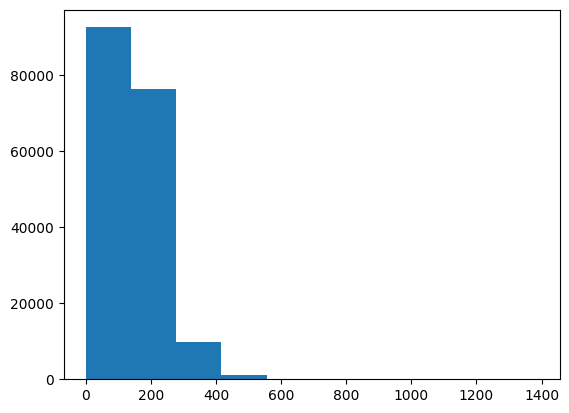

In [49]:
plt.hist(char_lens, bins = 10)

In [50]:
output_length = int(np.percentile(char_lens, 95))
output_length

290

In [51]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
num_tokens = len(alphabet) + 2 #(for space and out of vocab UNK = Unknown)
char_vectorizer = TextVectorization(max_tokens = num_tokens,
                                    output_sequence_length = output_length)

In [52]:
char_vectorizer.adapt(train_chars)

In [53]:
char_vocab = char_vectorizer.get_vocabulary()
print(len(char_vocab))

28


In [54]:
chosen = random.choice(train_chars)
char_vectorizer([chosen])

<tf.Tensor: shape=(1, 290), dtype=int64, numpy=
array([[15, 26,  8,  2, 11,  4, 14,  4,  2,  6,  3,  9, 13,  5, 10, 12,
         2,  9,  9, 11, 12,  4,  6,  4, 11,  5, 12, 15,  5, 12,  5,  8,
         4,  5,  3, 13,  5,  6,  9, 14,  8,  2, 11,  4, 14,  4,  2,  6,
         3,  9,  5,  6, 10,  3, 13,  2, 14,  8,  2, 18,  6,  5,  6, 11,
        19,  7, 16,  3, 11,  7, 15,  2,  9,  5,  6, 10,  9,  5, 17,  2,
         3, 19, 14,  8,  7, 17,  4, 12,  2, 20,  2,  8,  2,  9,  4, 15,
         4, 12,  5,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [55]:
# char level embeddings
char_embed = layers.Embedding(input_dim = len(char_vocab),
                              output_dim = 25,
                              mask_zero = True)

In [56]:
chosen = random.choice(train_chars)
char_embed(char_vectorizer([chosen]))

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[-0.01908162,  0.0060181 , -0.02577264, ...,  0.01363441,
         -0.04202565,  0.00718163],
        [-0.04277895,  0.03705019,  0.03098793, ...,  0.01785623,
         -0.04185635,  0.01450029],
        [ 0.03555088, -0.02115132,  0.01396048, ..., -0.02697448,
          0.04826539, -0.03610875],
        ...,
        [ 0.02499557,  0.03728198, -0.0220407 , ...,  0.03966654,
          0.03714201,  0.00784755],
        [ 0.02499557,  0.03728198, -0.0220407 , ...,  0.03966654,
          0.03714201,  0.00784755],
        [ 0.02499557,  0.03728198, -0.0220407 , ...,  0.03966654,
          0.03714201,  0.00784755]]], dtype=float32)>

In [57]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [58]:
inputs = layers.Input(shape=(1,), dtype = tf.string)

x = char_vectorizer(inputs)
x = char_embed(x)

y = layers.Conv1D(filters = 128, kernel_size = 15, padding = 'same', activation = 'relu')(x)
y = layers.GlobalMaxPool1D()(y)

y = layers.Dense(64, activation = 'relu')(y)
y = layers.Dropout(0.3)(y)
y = layers.Dense(32, activation = 'relu')(y)
y = layers.Dropout(0.3)(y)
y = layers.Dense(16, activation = 'relu')(y)

outputs = layers.Dense(classes, activation='softmax')(y)
model3 = tf.keras.Model(inputs, outputs)

In [59]:
model3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history3 = model3.fit(
    train_dataset,
    steps_per_epoch = int(0.1*len(train_dataset)),
    epochs = 3,
    validation_data = val_dataset,
    validation_steps = int(0.1*len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 45s 80ms/step - loss: 1.2393 - accuracy: 0.4827 - val_loss: 0.9637 - val_accuracy: 0.5891
Epoch 2/3
562/562 [==============================] - 41s 73ms/step - loss: 0.9696 - accuracy: 0.6134 - val_loss: 0.8377 - val_accuracy: 0.6632
Epoch 3/3
562/562 [==============================] - 44s 78ms/step - loss: 0.8996 - accuracy: 0.6432 - val_loss: 0.7872 - val_accuracy: 0.6865


In [60]:
model3.evaluate(val_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.8038 - accuracy: 0.6829


[0.8037627339363098, 0.6829074621200562]

In [61]:
preds3 = model3.predict(val_dataset)
preds3 = tf.argmax(preds3, axis = 1)
results3 = calculate_results(val_labels_encoded, preds3)
results3

{'accuracy': 68.29074539917913,
 'precision': 0.6753795828945348,
 'recall': 0.6829074539917913,
 'f1': 0.6721349734341179}

### ⭐ Model 4 | Concatenation
- token level embedding
- character level embedding
- combination of token and character level embedding
- literally we are gonna concatenate model 2 and 3

In [62]:
# Step1: token level embeddings

token_inputs = layers.Input(shape=[], dtype = tf.string)
token_embeddings = use_encoder_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

In [63]:
#Step2: Character level embeddings

char_inputs = layers.Input(shape=(1,), dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bilstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bilstm)

In [64]:
#Step3: Concatenation of 2 Models

token_char_model = layers.Concatenate()([token_model.output, char_model.output])

In [65]:
# Step4: Output layer for combined model

combined_dropout = layers.Dropout(0.5)(token_char_model)
combined_dense = layers.Dense(128, activation = 'relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output = layers.Dense(5, activation = 'softmax')(final_dropout)

In [66]:
# Step5: Construction of model

model4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                        outputs = output,)

In [67]:
model4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_5[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_4[0][0]']          

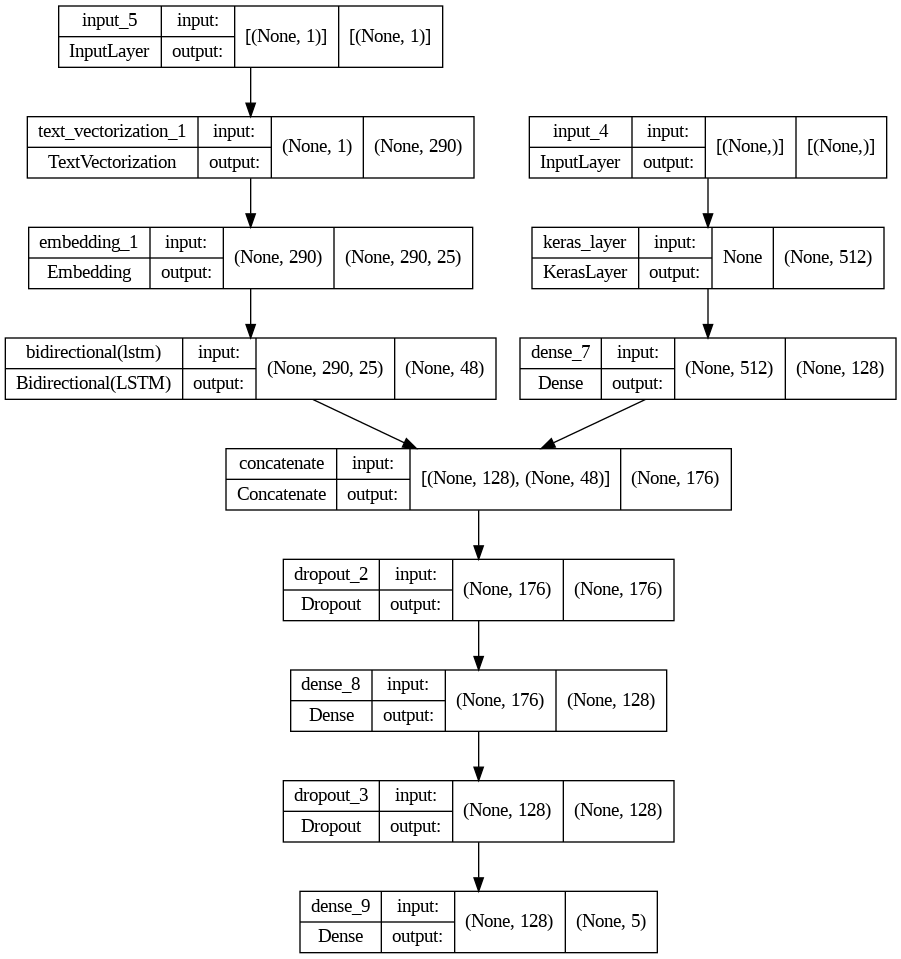

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)

In [69]:
train_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_labels = tf.data.Dataset.from_tensor_slices((train_labels))
train_dataset = tf.data.Dataset.zip((train_data, train_labels))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_labels = tf.data.Dataset.from_tensor_slices((val_labels))
val_dataset = tf.data.Dataset.zip((val_data, val_labels))

val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [70]:
train_dataset, val_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [71]:
model4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history4 = model4.fit(
    train_dataset,
    epochs = 3,
    steps_per_epoch = int(0.1*len(train_dataset)),
    validation_data = val_dataset,
    validation_steps = int(0.1*len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 182s 310ms/step - loss: 0.9883 - accuracy: 0.6087 - val_loss: 0.7939 - val_accuracy: 0.6965
Epoch 2/3
562/562 [==============================] - 170s 303ms/step - loss: 0.8028 - accuracy: 0.6935 - val_loss: 0.7171 - val_accuracy: 0.7274
Epoch 3/3
562/562 [==============================] - 187s 332ms/step - loss: 0.7833 - accuracy: 0.7031 - val_loss: 0.7015 - val_accuracy: 0.7297


In [72]:
preds4 = model4.predict(val_dataset)
preds4 = tf.argmax(preds4, axis = 1)
results4 = calculate_results(val_labels_encoded, preds4)
results4

{'accuracy': 72.94452535416391,
 'precision': 0.7312868451781568,
 'recall': 0.7294452535416391,
 'f1': 0.7260549571145214}

### ⭐ Model 5 | AIO
- Pre trained token embeddings
- character embeddings
- positional embeddings

In [73]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


<Axes: >

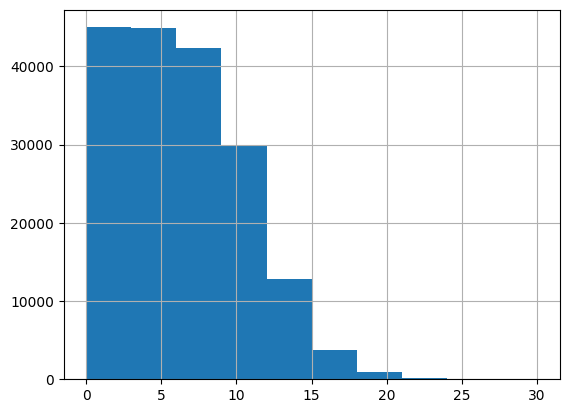

In [74]:
train_df['line_number'].hist()

In [75]:
np.percentile(train_df['line_number'], 95)

13.0

In [76]:
# one hot encode the values from line_numbers column
# here we only do it for 15lines as the majority of em lies below 15

In [77]:
train_df_line_numbers = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_df_line_numbers = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_df_line_numbers = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)
(train_df_line_numbers.shape ,val_df_line_numbers.shape, test_df_line_numbers.shape)

(TensorShape([180040, 15]), TensorShape([30212, 15]), TensorShape([30135, 15]))

<Axes: >

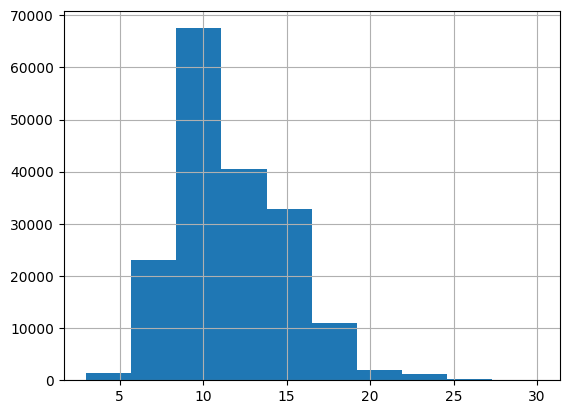

In [78]:
# apply the same shit for total lines feature!

train_df['total_lines'].hist()

In [79]:
np.percentile(train_df['total_lines'], 95)

18.0

In [80]:
train_df_total_lines = tf.one_hot(train_df['total_lines'].to_numpy(), depth = 20)
val_df_total_lines = tf.one_hot(val_df['total_lines'].to_numpy(), depth = 20)
test_df_total_lines = tf.one_hot(test_df['total_lines'].to_numpy(), depth = 20)

(train_df_total_lines.shape ,val_df_total_lines.shape, test_df_total_lines.shape)

(TensorShape([180040, 20]), TensorShape([30212, 20]), TensorShape([30135, 20]))

In [81]:
'''
Steps for Building the Tribrid model
1. create a token level model
2. create a character level model
3. create a model for line_numbers feature
4. create a model for total_lines feature
5. concatenate the outputs of 1 & 2
6. concatenate the outputs of 5 & 3 & 4
7. an output layer accepting the outpus of all the above model
8. skimlite says womp womp nigga
'''

'\nSteps for Building the Tribrid model\n1. create a token level model\n2. create a character level model\n3. create a model for line_numbers feature\n4. create a model for total_lines feature\n5. concatenate the outputs of 1 & 2\n6. concatenate the outputs of 5 & 3 & 4\n7. an output layer accepting the outpus of all the above model\n8. skimlite says womp womp nigga\n'

In [82]:
# step1

token_inputs = layers.Input(shape=[], dtype = tf.string)
token_embeddings = use_encoder_layer(token_inputs)

token_outputs = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

In [83]:
#step2

char_inputs = layers.Input(shape =(1,), dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)

char_embeddings = char_embed(char_vectors)
char_bilstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bilstm)

In [84]:
# step3

line_number_input = layers.Input(shape=(15,), dtype = tf.float32)
x = layers.Dense(32, activation = 'relu')(line_number_input)
line_number_model = tf.keras.Model(line_number_input, x)

In [85]:
# step4

total_lines_input = layers.Input(shape=(20,), dtype = tf.float32)
y = layers.Dense(32, activation = 'relu')(total_lines_input)
total_lines_model = tf.keras.Model(total_lines_input, y)

In [86]:
(train_df_line_numbers[0].dtype, train_df_total_lines[0].dtype)

(tf.float32, tf.float32)

In [89]:
# step5

combined1 = layers.Concatenate()([token_model.output, char_model.output])
# z = layers.Dense(256, activation = 'relu')(combined1)
z = layers.Dropout(0.5)(combined1)

In [90]:
# step6

combined2 = layers.Concatenate()([line_number_model.output, total_lines_model.output, z])

In [91]:
# step7

output_layer = layers.Dense(5, activation = 'softmax')(combined2)

In [92]:
# step8

model5 = tf.keras.Model(inputs = [line_number_model.input, total_lines_model.input,
                                  token_model.input, char_model.input], outputs = output_layer)

In [93]:
model5.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_7[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_6[0][0]']         

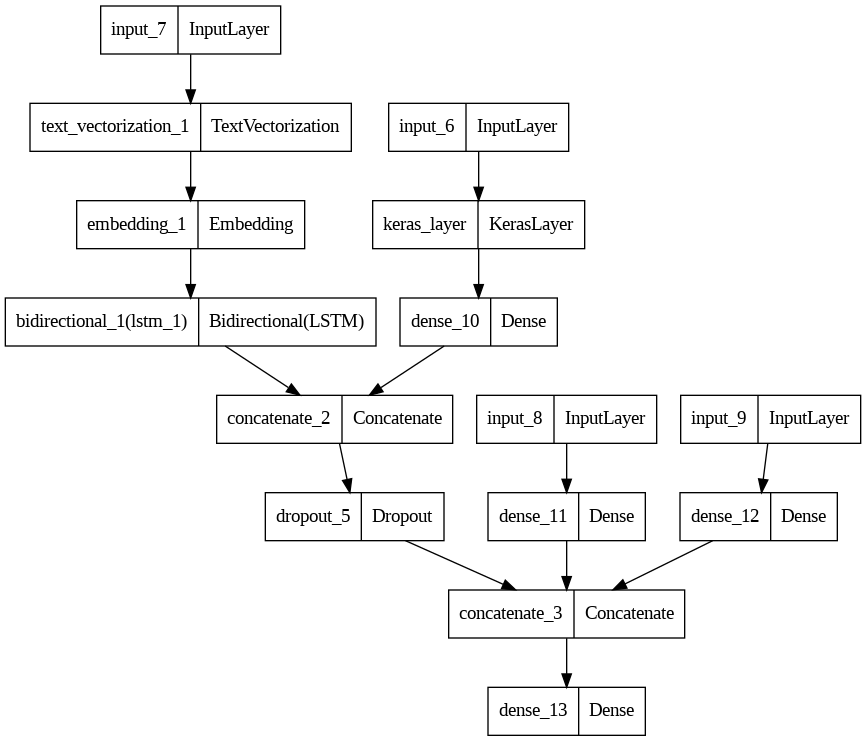

In [94]:
plot_model(model5)

In [95]:
# pipelining dataset

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_df_line_numbers,
                                                            train_df_total_lines,
                                                            train_sentences,
                                                            train_chars))

train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels)

train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_df_line_numbers,
                                                            val_df_total_lines,
                                                            val_sentences,
                                                            val_chars))

val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels)

val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [96]:
(train_char_token_dataset, val_char_token_dataset)

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [97]:
# label smoothing will assign lil value from the highest prob class to minorities
# in hopes to increase generalization

model5.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history5 = model5.fit(
    train_char_token_dataset,
    epochs = 3,
    steps_per_epoch = int(0.1*len(train_char_token_dataset)),
    validation_data = val_char_token_dataset,
    validation_steps = int(0.1*len(val_char_token_dataset))
)

Epoch 1/3
562/562 [==============================] - 206s 353ms/step - loss: 1.1162 - accuracy: 0.7174 - val_loss: 0.9898 - val_accuracy: 0.7985
Epoch 2/3
562/562 [==============================] - 181s 321ms/step - loss: 0.9846 - accuracy: 0.8041 - val_loss: 0.9638 - val_accuracy: 0.8155
Epoch 3/3
562/562 [==============================] - 182s 325ms/step - loss: 0.9703 - accuracy: 0.8117 - val_loss: 0.9571 - val_accuracy: 0.8182


In [98]:
preds5 = model5.predict(val_char_token_dataset)
preds5 = tf.argmax(preds5, axis = 1)
results5 = calculate_results(val_labels_encoded, preds5)
results5

{'accuracy': 82.19250628889183,
 'precision': 0.820376416290907,
 'recall': 0.8219250628889183,
 'f1': 0.8207767018907033}

## 🔴 Combining all results

In [99]:
all_results = pd.DataFrame({"Model 0": results0,
                            "Model 1": results1,
                            "Model 2": results2,
                            "Model 3": results3,
                            "Model 4": results4,
                            "Model 5": results5})

all_results = all_results.transpose()
all_results

,accuracy,precision,recall,f1
Model 0,72.183238,0.718647,0.721832,0.698925
Model 1,78.753475,0.784423,0.787535,0.785089
Model 2,71.610618,0.716495,0.716106,0.713232
Model 3,68.290745,0.675380,0.682907,0.672135
Model 4,72.944525,0.731287,0.729445,0.726055
Model 5,82.192506,0.820376,0.821925,0.820777


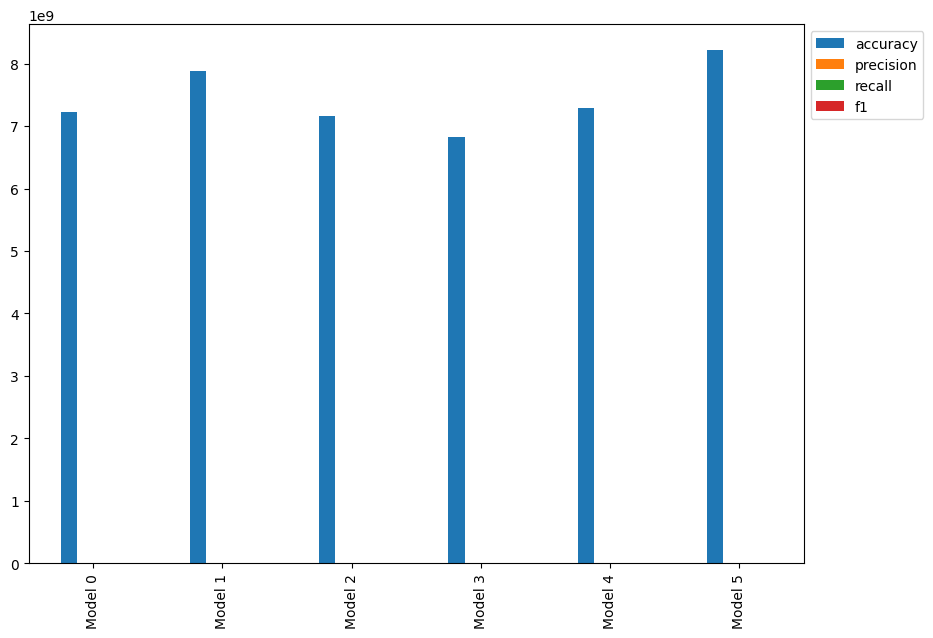

In [107]:
all_results['accuracy'] = all_results['accuracy']*100
all_results.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

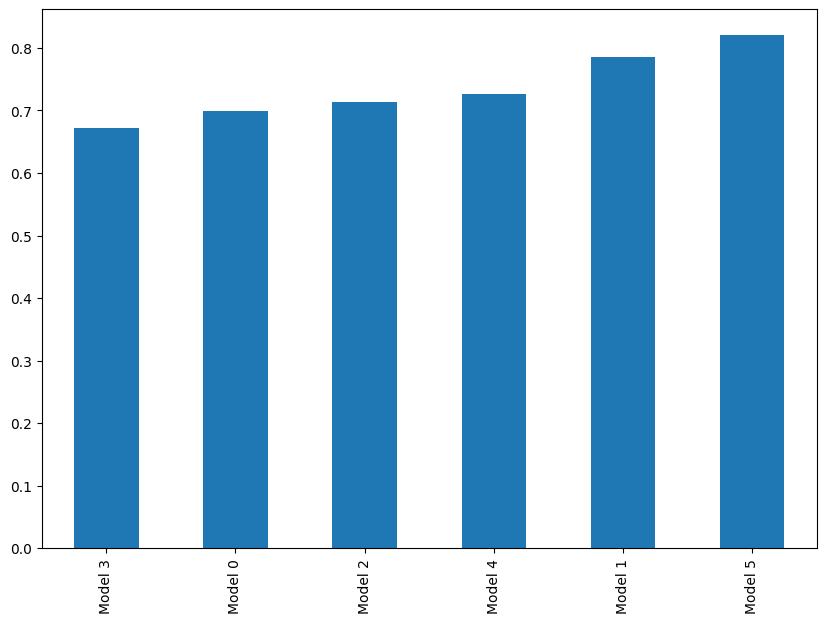

In [101]:
all_results.sort_values("f1", ascending=True)['f1'].plot(kind='bar', figsize=(10,7))

## 🔴 After Math

In [104]:
model5.save("Model")

In [105]:
%%time
test_pred_classes = [label_encoder.classes_[pred] for pred in preds5]
test_pred_classes

CPU times: user 4.59 s, sys: 13.4 ms, total: 4.6 s
Wall time: 4.59 s


['BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'CONCLUSIONS',
 'RESULTS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'BACKGROUND',
 'OBJECTIVE',
 'RESULTS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RE